#Preprocessing and EDA#


In [ ]:
import os
import librosa
import numpy as np
import pandas as pd
import requests
from google.colab import drive

drive.mount('/content/gdrive')  # Connect to your Google Drive account

data_dir = '/content/gdrive/MyDrive/audio_data2'  # Update with your data directory in Google Drive



Mounted at /content/gdrive


In [ ]:
import requests
import json
import pandas as pd

# Species list
species_list = ['Grey francolin', 'Purple sunbird', 'Common Tailorbird', 'Red-vented Bulbul', 'Indian Bush Lark', 'Siberian Stonechat ', 'Bay-backed Shrike', 'Indian roller', 'Indian Peafowl', 'Plain Prinia']

# Create empty dataframe
df = pd.DataFrame(columns=['id', 'gen', 'sp', 'ssp', 'en', 'rec', 'cnt', 'loc', 'lat', 'lng', 'alt', 'type', 'url', 'file', 'file-name', 'sono', 'lic', 'q', 'length', 'time', 'date', 'uploaded', 'also', 'rmk', 'bird-seen', 'playback-used'])

# Loop through species list and extract data
for species in species_list:
    query = f'https://www.xeno-canto.org/api/2/recordings?query={species}%20cnt:India'
    response = requests.get(query)
    if response.status_code == 200:
        data = response.json()
        temp_df = pd.json_normalize(data['recordings'])
        df = pd.concat([df, temp_df], ignore_index=True)

# Save as CSV
df.to_csv('indian_species.csv', index=False)


In [ ]:
df=df [['id', 'gen', 'sp', 'ssp', 'en', 'rec', 'cnt', 'loc', 'lat', 'lng', 'alt', 'type', 'url', 'file', 'file-name', 'sono', 'lic', 'q', 'length', 'time', 'date', 'uploaded', 'also', 'rmk', 'bird-seen', 'playback-used']]

In [ ]:
df

,id,gen,sp,ssp,en,rec,cnt,loc,lat,lng,...,lic,q,length,time,date,uploaded,also,rmk,bird-seen,playback-used
0,775466,Ortygornis,pondicerianus,,Grey Francolin,Jelle Scharringa,India,"Ghasaula, Bharatpur, Rajasthan",27.1599,77.5418,...,//creativecommons.org/licenses/by-nc-sa/4.0/,A,0:09,17:15,1986-02-15,2023-01-14,"[Psittacula krameri, Spilopelia senegalensis]",At Eastern Boundary\r\n,yes,no
1,706170,Ortygornis,pondicerianus,interpositus,Grey Francolin,Kousheyo Bagchi,India,"Barshul Birding Hotspot, Bardhaman, West Bengal",23.175,87.9566,...,//creativecommons.org/licenses/by-nc-nd/4.0/,A,0:11,16:00,2021-10-03,2022-03-05,[],Dry vegetations around R. Damodar. Eastern edg...,unknown,unknown
2,667224,Ortygornis,pondicerianus,,Grey Francolin,Jelle Scharringa,India,"Shreenagar Rural, Bharatpur, Rajasthan",27.1536,77.5465,...,//creativecommons.org/licenses/by-nc-sa/4.0/,A,1:38,18:00,1986-02-11,2021-08-09,"[Ficedula parva, Argya striata]",Several birds on ground calling from many dire...,yes,no
3,667223,Ortygornis,pondicerianus,,Grey Francolin,Jelle Scharringa,India,"Shreenagar Rural, Bharatpur, Rajasthan",27.1536,77.5465,...,//creativecommons.org/licenses/by-nc-sa/4.0/,A,0:45,11:30,1986-02-11,2021-08-09,"[Corvus splendens, Psittacula krameri, Spilope...",Several birds on ground calling from different...,yes,no
4,611583,Ortygornis,pondicerianus,,Grey Francolin,Jelle Scharringa,India,"Tal, Kutch, Gujarat",23.5979,69.2405,...,//creativecommons.org/licenses/by-nc-sa/4.0/,A,0:35,08:00,2012-02-20,2020-12-30,[Grus grus],Banni Grasslands.,yes,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,74456,Prinia,inornata,terricolor,Plain Prinia,Mike Nelson,India,Sultanpur Bird Sanctuary,28.464,76.893,...,//creativecommons.org/licenses/by-nc-sa/3.0/,C,0:19,4:30pm,2011-03-06,2011-03-27,[],"Two birds in tall reeds next to the jheel, me ...",no,no
508,592502,Prinia,inornata,,Plain Prinia,Roozbeh Gazdar,India,"Bhandup Pumping Stn., Mumbai Suburban, Maharas...",19.1341,72.9616,...,//creativecommons.org/licenses/by-nc-sa/4.0/,D,1:02,08:00,2020-10-02,2020-10-03,[],A group of 4-5 birds calling from foliage wher...,yes,no
509,492386,Prinia,inornata,,Plain Prinia,Prashant Kumar,India,"Maholi Jangal, Udham Singh Nagar, Uttarakhand",29.1536,79.2625,...,//creativecommons.org/licenses/by-nc-sa/4.0/,D,0:20,10:55,2019-01-18,2019-08-13,[],,yes,no
510,452277,Prinia,inornata,,Plain Prinia,Vivek Puliyeri,India,"Potheri Lake, Kanchipuram, Tamil Nadu",12.8174,80.0449,...,//creativecommons.org/licenses/by-nc-sa/4.0/,D,0:07,15:39,2019-01-13,2019-01-18,[],,yes,no


In [ ]:
np.unique(df['type'])

array(['', '?', 'aberrant, call, song', 'aberrant, hatchling or nestling',
       'aberrant, song', 'alarm call', 'alarm call, begging call',
       'alarm call, call', 'alarm call, call, flight call, song',
       'alarm call, call, song', 'alarm call, flight call',
       'begging call', 'begging call, two wheeler', 'call',
       'call, drumming', 'call, duet', 'call, flight call',
       'call, flight call, song', 'call, song',
       'call, song, contact call',
       'call, song, thermal power station in service',
       'call, teaching nestling how we call', 'call?', 'duet, song',
       'fight of 2 males', 'flight call', 'flight call, song',
       'imitation, song, imitation tits (parus spp) song', 'song',
       'song, immature male', 'song, rock bush', 'song, subsong',
       'uncertain'], dtype=object)

In [ ]:
df.to_csv('indian_species.csv', index=False)

In [ ]:
df = pd.DataFrame(df[df['type'].str.contains('call')])


In [ ]:
df['en'].unique()

array(['Grey Francolin', 'Purple Sunbird', 'Common Tailorbird',
       'Red-vented Bulbul', 'Indian Bush Lark', 'Siberian Stonechat',
       'Bay-backed Shrike', 'Indian Roller', 'Indian Peafowl',
       'Plain Prinia'], dtype=object)

In [ ]:
df

,id,gen,sp,ssp,en,rec,cnt,loc,lat,lng,...,lic,q,length,time,date,uploaded,also,rmk,bird-seen,playback-used
6,472717,Ortygornis,pondicerianus,,Grey Francolin,Peter Boesman,India,"Keoladeo National Park, Bharatpur, Rajasthan",27.1593,77.5232,...,//creativecommons.org/licenses/by-nc-nd/4.0/,A,0:16,07:30,2019-04-06,2019-05-10,[],,unknown,unknown
7,459199,Ortygornis,pondicerianus,,Grey Francolin,Vivek Puliyeri,India,"IIT Madras, Chennai, Tamil Nadu",12.9912,80.2363,...,//creativecommons.org/licenses/by-nc-sa/4.0/,A,0:12,07:00,2019-02-25,2019-02-25,[],,no,no
8,441379,Ortygornis,pondicerianus,,Grey Francolin,Sreekumar Chirukandoth,India,"Bareilly, Bareilly, Uttar Pradesh",28.3967,79.4319,...,//creativecommons.org/licenses/by-nc-sa/4.0/,A,0:07,08:00,2018-10-14,2018-11-05,[Corvus splendens],An individual calling from the fields,yes,no
9,351857,Ortygornis,pondicerianus,,Grey Francolin,Oscar Campbell,India,"Bari, Udaipur, Rajasthan",24.6227,73.6597,...,//creativecommons.org/licenses/by-nc-sa/4.0/,A,0:21,08:30,2016-12-24,2017-01-22,[],Calling from dense scrub on edge of field on b...,no,no
10,337047,Ortygornis,pondicerianus,,Grey Francolin,Craig Robertson,India,"Shreenagar Rural, Bharatpur, Rajasthan",27.1453,77.547,...,//creativecommons.org/licenses/by-nc-sa/4.0/,A,0:51,08:00,2007-03-21,2016-10-04,[],"Recorded in the hotel yard, Bharatpur Bird Par...",yes,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,87721,Prinia,inornata,,Plain Prinia,vir joshi,India,saldi pond amreli gujarat India,21.593,71.312,...,//creativecommons.org/licenses/by-nc-nd/2.5/,C,0:13,5:00 pm,2011-09-28,2011-09-28,[],,unknown,unknown
508,592502,Prinia,inornata,,Plain Prinia,Roozbeh Gazdar,India,"Bhandup Pumping Stn., Mumbai Suburban, Maharas...",19.1341,72.9616,...,//creativecommons.org/licenses/by-nc-sa/4.0/,D,1:02,08:00,2020-10-02,2020-10-03,[],A group of 4-5 birds calling from foliage wher...,yes,no
509,492386,Prinia,inornata,,Plain Prinia,Prashant Kumar,India,"Maholi Jangal, Udham Singh Nagar, Uttarakhand",29.1536,79.2625,...,//creativecommons.org/licenses/by-nc-sa/4.0/,D,0:20,10:55,2019-01-18,2019-08-13,[],,yes,no
510,452277,Prinia,inornata,,Plain Prinia,Vivek Puliyeri,India,"Potheri Lake, Kanchipuram, Tamil Nadu",12.8174,80.0449,...,//creativecommons.org/licenses/by-nc-sa/4.0/,D,0:07,15:39,2019-01-13,2019-01-18,[],,yes,no


In [ ]:
df=df.drop(['ssp'], axis=1)


In [ ]:
df2=df.drop(['rmk'],axis=1)
df2.isnull().sum()

id                 0
gen                0
sp                 0
en                 0
rec                0
cnt                0
loc                0
lat                3
lng                3
alt                0
type               0
url                0
file               0
file-name          0
sono             342
lic                0
q                  0
length             0
time               0
date               0
uploaded           0
also               0
bird-seen          0
playback-used      0
dtype: int64

In [ ]:
df2

,id,gen,sp,en,rec,cnt,loc,lat,lng,alt,...,sono,lic,q,length,time,date,uploaded,also,bird-seen,playback-used
6,472717,Ortygornis,pondicerianus,Grey Francolin,Peter Boesman,India,"Keoladeo National Park, Bharatpur, Rajasthan",27.1593,77.5232,,...,NaN,//creativecommons.org/licenses/by-nc-nd/4.0/,A,0:16,07:30,2019-04-06,2019-05-10,[],unknown,unknown
7,459199,Ortygornis,pondicerianus,Grey Francolin,Vivek Puliyeri,India,"IIT Madras, Chennai, Tamil Nadu",12.9912,80.2363,10,...,NaN,//creativecommons.org/licenses/by-nc-sa/4.0/,A,0:12,07:00,2019-02-25,2019-02-25,[],no,no
8,441379,Ortygornis,pondicerianus,Grey Francolin,Sreekumar Chirukandoth,India,"Bareilly, Bareilly, Uttar Pradesh",28.3967,79.4319,180,...,NaN,//creativecommons.org/licenses/by-nc-sa/4.0/,A,0:07,08:00,2018-10-14,2018-11-05,[Corvus splendens],yes,no
9,351857,Ortygornis,pondicerianus,Grey Francolin,Oscar Campbell,India,"Bari, Udaipur, Rajasthan",24.6227,73.6597,600,...,NaN,//creativecommons.org/licenses/by-nc-sa/4.0/,A,0:21,08:30,2016-12-24,2017-01-22,[],no,no
10,337047,Ortygornis,pondicerianus,Grey Francolin,Craig Robertson,India,"Shreenagar Rural, Bharatpur, Rajasthan",27.1453,77.547,180,...,NaN,//creativecommons.org/licenses/by-nc-sa/4.0/,A,0:51,08:00,2007-03-21,2016-10-04,[],yes,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,87721,Prinia,inornata,Plain Prinia,vir joshi,India,saldi pond amreli gujarat India,21.593,71.312,?,...,NaN,//creativecommons.org/licenses/by-nc-nd/2.5/,C,0:13,5:00 pm,2011-09-28,2011-09-28,[],unknown,unknown
508,592502,Prinia,inornata,Plain Prinia,Roozbeh Gazdar,India,"Bhandup Pumping Stn., Mumbai Suburban, Maharas...",19.1341,72.9616,0,...,NaN,//creativecommons.org/licenses/by-nc-sa/4.0/,D,1:02,08:00,2020-10-02,2020-10-03,[],yes,no
509,492386,Prinia,inornata,Plain Prinia,Prashant Kumar,India,"Maholi Jangal, Udham Singh Nagar, Uttarakhand",29.1536,79.2625,240,...,NaN,//creativecommons.org/licenses/by-nc-sa/4.0/,D,0:20,10:55,2019-01-18,2019-08-13,[],yes,no
510,452277,Prinia,inornata,Plain Prinia,Vivek Puliyeri,India,"Potheri Lake, Kanchipuram, Tamil Nadu",12.8174,80.0449,40,...,NaN,//creativecommons.org/licenses/by-nc-sa/4.0/,D,0:07,15:39,2019-01-13,2019-01-18,[],yes,no


In [ ]:
df4=df2[["id","en","loc","lat","lng","file","length"]]
df4

,id,en,loc,lat,lng,file,length
6,472717,Grey Francolin,"Keoladeo National Park, Bharatpur, Rajasthan",27.1593,77.5232,https://xeno-canto.org/472717/download,0:16
7,459199,Grey Francolin,"IIT Madras, Chennai, Tamil Nadu",12.9912,80.2363,https://xeno-canto.org/459199/download,0:12
8,441379,Grey Francolin,"Bareilly, Bareilly, Uttar Pradesh",28.3967,79.4319,https://xeno-canto.org/441379/download,0:07
9,351857,Grey Francolin,"Bari, Udaipur, Rajasthan",24.6227,73.6597,https://xeno-canto.org/351857/download,0:21
10,337047,Grey Francolin,"Shreenagar Rural, Bharatpur, Rajasthan",27.1453,77.547,https://xeno-canto.org/337047/download,0:51
...,...,...,...,...,...,...,...
506,87721,Plain Prinia,saldi pond amreli gujarat India,21.593,71.312,https://xeno-canto.org/87721/download,0:13
508,592502,Plain Prinia,"Bhandup Pumping Stn., Mumbai Suburban, Maharas...",19.1341,72.9616,https://xeno-canto.org/592502/download,1:02
509,492386,Plain Prinia,"Maholi Jangal, Udham Singh Nagar, Uttarakhand",29.1536,79.2625,https://xeno-canto.org/492386/download,0:20
510,452277,Plain Prinia,"Potheri Lake, Kanchipuram, Tamil Nadu",12.8174,80.0449,https://xeno-canto.org/452277/download,0:07


In [ ]:
df4['lng'] = pd.to_numeric(df4['lng'])

<ipython-input-15-668c6f565b72>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['lng'] = pd.to_numeric(df4['lng'])


In [ ]:
df4['lat'] = pd.to_numeric(df4['lat'])

<ipython-input-16-8b213974713b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['lat'] = pd.to_numeric(df4['lat'])


In [ ]:
df4

,id,en,loc,lat,lng,file,length
6,472717,Grey Francolin,"Keoladeo National Park, Bharatpur, Rajasthan",27.1593,77.5232,https://xeno-canto.org/472717/download,0:16
7,459199,Grey Francolin,"IIT Madras, Chennai, Tamil Nadu",12.9912,80.2363,https://xeno-canto.org/459199/download,0:12
8,441379,Grey Francolin,"Bareilly, Bareilly, Uttar Pradesh",28.3967,79.4319,https://xeno-canto.org/441379/download,0:07
9,351857,Grey Francolin,"Bari, Udaipur, Rajasthan",24.6227,73.6597,https://xeno-canto.org/351857/download,0:21
10,337047,Grey Francolin,"Shreenagar Rural, Bharatpur, Rajasthan",27.1453,77.5470,https://xeno-canto.org/337047/download,0:51
...,...,...,...,...,...,...,...
506,87721,Plain Prinia,saldi pond amreli gujarat India,21.5930,71.3120,https://xeno-canto.org/87721/download,0:13
508,592502,Plain Prinia,"Bhandup Pumping Stn., Mumbai Suburban, Maharas...",19.1341,72.9616,https://xeno-canto.org/592502/download,1:02
509,492386,Plain Prinia,"Maholi Jangal, Udham Singh Nagar, Uttarakhand",29.1536,79.2625,https://xeno-canto.org/492386/download,0:20
510,452277,Plain Prinia,"Potheri Lake, Kanchipuram, Tamil Nadu",12.8174,80.0449,https://xeno-canto.org/452277/download,0:07


Minimum duration: 0:00
Maximum duration: 3:21


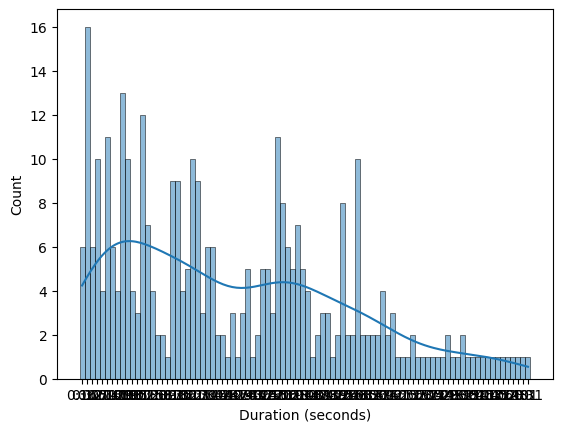

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataframe is called df2 and the duration column is called "duration"
duration_data = df4["length"]

# Print minimum and maximum duration
print("Minimum duration:", duration_data.min())
print("Maximum duration:", duration_data.max())

# Create histogram with KDE plot
sns.histplot(duration_data, bins=50, kde=True)

# Set x and y axis labels
plt.xlabel("Duration (seconds)")
plt.ylabel("Count")

# Show the plot
plt.show()


In [ ]:
def is_desert(latitude, longitude):
    # Check if the latitude and longitude fall within the range of the Thar Desert
    if latitude >= 24.6 and latitude <= 30.5 and longitude >= 68.7 and longitude <= 75.3:
        return 1
    else:
        return 0

# Apply the is_desert function to the latitude and longitude columns
df4['Desert/Non-Desert'] = np.vectorize(is_desert)(df4['lat'], df4['lng'])

df5=df4.drop(['loc','lat','lng'],axis=1)
df5

/usr/local/lib/python3.9/dist-packages/numpy/lib/function_base.py:2387: RuntimeWarning: invalid value encountered in is_desert (vectorized)
  outputs = ufunc(*inputs)
<ipython-input-19-6c842a43dd23>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Desert/Non-Desert'] = np.vectorize(is_desert)(df4['lat'], df4['lng'])


,id,en,file,length,Desert/Non-Desert
6,472717,Grey Francolin,https://xeno-canto.org/472717/download,0:16,0
7,459199,Grey Francolin,https://xeno-canto.org/459199/download,0:12,0
8,441379,Grey Francolin,https://xeno-canto.org/441379/download,0:07,0
9,351857,Grey Francolin,https://xeno-canto.org/351857/download,0:21,1
10,337047,Grey Francolin,https://xeno-canto.org/337047/download,0:51,0
...,...,...,...,...,...
506,87721,Plain Prinia,https://xeno-canto.org/87721/download,0:13,0
508,592502,Plain Prinia,https://xeno-canto.org/592502/download,1:02,0
509,492386,Plain Prinia,https://xeno-canto.org/492386/download,0:20,0
510,452277,Plain Prinia,https://xeno-canto.org/452277/download,0:07,0


In [ ]:
df5.isnull().sum()

id                   0
en                   0
file                 0
length               0
Desert/Non-Desert    0
dtype: int64

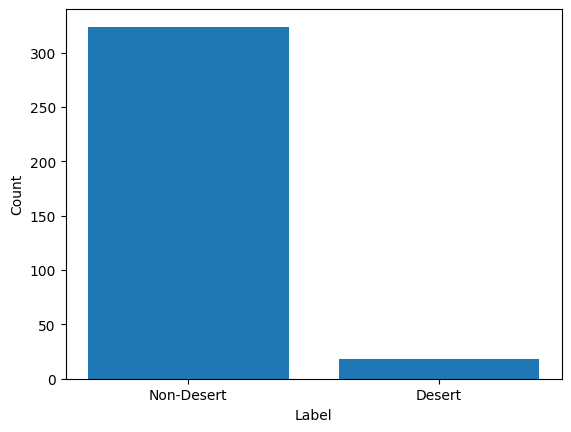

In [ ]:
import matplotlib.pyplot as plt

# Assuming your dataframe is called df5 and the "desert/non desert" column is called "label"
label_counts = df5["Desert/Non-Desert"].value_counts()

# Create bar graph
plt.bar(label_counts.index, label_counts.values)

# Set x and y axis labels
plt.xlabel("Label")
plt.ylabel("Count")

# Set x axis tick labels
plt.xticks([0, 1], ["Non-Desert", "Desert"])

# Show the plot
plt.show()


In [ ]:
desert_rows = df5[df5["Desert/Non-Desert"] == 1]
print("Rows with Desert label:\n", desert_rows)

Rows with Desert label:
          id                 en                                    file length  \
9    351857     Grey Francolin  https://xeno-canto.org/351857/download   0:21   
11   167566     Grey Francolin  https://xeno-canto.org/167566/download   0:10   
27   308191     Grey Francolin  https://xeno-canto.org/308191/download   0:13   
28   308183     Grey Francolin  https://xeno-canto.org/308183/download   0:25   
33   165833     Grey Francolin  https://xeno-canto.org/165833/download   0:58   
34   149584     Grey Francolin  https://xeno-canto.org/149584/download   1:09   
35   149582     Grey Francolin  https://xeno-canto.org/149582/download   1:17   
36   129278     Grey Francolin  https://xeno-canto.org/129278/download   0:18   
68   460278     Purple Sunbird  https://xeno-canto.org/460278/download   0:34   
85   165447     Purple Sunbird  https://xeno-canto.org/165447/download   0:40   
87   149562     Purple Sunbird  https://xeno-canto.org/149562/download   0:37   
88 

In [ ]:
bird_names = desert_rows["en"].unique()


bird_counts = {}


for bird in bird_names:
    count = desert_rows[desert_rows["en"] == bird].shape[0]
    bird_counts[bird] = count

for bird, count in bird_counts.items():
    print(f"{bird}: {count}")

Grey Francolin: 8
Purple Sunbird: 5
Common Tailorbird: 1
Red-vented Bulbul: 2
Indian Peafowl: 2


In [ ]:
!pip install wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9676 sha256=8ab24644807ddfd6fdb955854c716dcda782e7ad01022e06ad01ef6975920306
  Stored in directory: /root/.cache/pip/wheels/04/5f/3e/46cc37c5d698415694d83f607f833f83f0149e49b3af9d0f38
Successfully built wget


In [ ]:
import wget

In [ ]:
download_path = data_dir

In [ ]:
df5

,id,en,file,length,Desert/Non-Desert
6,472717,Grey Francolin,https://xeno-canto.org/472717/download,0:16,0
7,459199,Grey Francolin,https://xeno-canto.org/459199/download,0:12,0
8,441379,Grey Francolin,https://xeno-canto.org/441379/download,0:07,0
9,351857,Grey Francolin,https://xeno-canto.org/351857/download,0:21,1
10,337047,Grey Francolin,https://xeno-canto.org/337047/download,0:51,0
...,...,...,...,...,...
506,87721,Plain Prinia,https://xeno-canto.org/87721/download,0:13,0
508,592502,Plain Prinia,https://xeno-canto.org/592502/download,1:02,0
509,492386,Plain Prinia,https://xeno-canto.org/492386/download,0:20,0
510,452277,Plain Prinia,https://xeno-canto.org/452277/download,0:07,0


In [ ]:






for index, row in df5.iterrows():
    xc_id = row['id']
    audio_url = row['file']
    if audio_url:
        filename = f"{xc_id}.mp3"
        filepath = os.path.join(download_path, filename)
        if not os.path.exists(filepath):
            print(f"Downloading audio {xc_id}...")
            wget.download(audio_url, filepath)
        else:
            print(f"Audio {xc_id} already downloaded.")


Audio 472717 already downloaded.
Audio 459199 already downloaded.
Audio 441379 already downloaded.
Audio 351857 already downloaded.
Audio 337047 already downloaded.
Audio 167566 already downloaded.
Audio 149685 already downloaded.
Audio 149684 already downloaded.
Audio 94589 already downloaded.
Audio 575657 already downloaded.
Audio 474849 already downloaded.
Audio 469359 already downloaded.
Audio 459288 already downloaded.
Audio 459287 already downloaded.
Audio 451799 already downloaded.
Audio 406118 already downloaded.
Audio 334051 already downloaded.
Audio 332453 already downloaded.
Audio 308191 already downloaded.
Audio 308183 already downloaded.
Audio 199108 already downloaded.
Audio 194204 already downloaded.
Audio 166155 already downloaded.
Audio 165833 already downloaded.
Audio 149584 already downloaded.
Audio 149582 already downloaded.
Audio 129278 already downloaded.
Audio 619357 already downloaded.
Audio 442342 already downloaded.
Audio 74555 already downloaded.
Audio 21668 

In [ ]:
def extract_max_energy(S, sr):
    # Remove noise
    S = librosa.decompose.nn_filter(S, aggregate=np.median, metric='cosine')

    # Find the 5-second window with the maximum energy
    window_size_frames =5* sr  // 512  # 512 is the default hop length used by librosa
    num_windows = S.shape[1] // window_size_frames
    #print(window_size_frames, num_windows)

    max_energy = 0
    max_start = 0
    for i in range(num_windows):
        start = i * window_size_frames
        end = start + window_size_frames
        energy = np.sum(S[:, start:end])
        if energy > max_energy:
            max_energy = energy
            max_start = start
    max_end = max_start + window_size_frames
   # print(max_start, max_end)
    # Extract the 5 seconds of spectrogram with maximum energy
    S_max_energy = S[:, max_start:max_end]

    return S_max_energy


In [ ]:
df5['Spectrogram'] = None

In [ ]:
df5

,id,en,file,length,Desert/Non-Desert,Spectrogram
6,472717,Grey Francolin,https://xeno-canto.org/472717/download,0:16,0,None
7,459199,Grey Francolin,https://xeno-canto.org/459199/download,0:12,0,None
8,441379,Grey Francolin,https://xeno-canto.org/441379/download,0:07,0,None
9,351857,Grey Francolin,https://xeno-canto.org/351857/download,0:21,1,None
10,337047,Grey Francolin,https://xeno-canto.org/337047/download,0:51,0,None
...,...,...,...,...,...,...
506,87721,Plain Prinia,https://xeno-canto.org/87721/download,0:13,0,None
508,592502,Plain Prinia,https://xeno-canto.org/592502/download,1:02,0,None
509,492386,Plain Prinia,https://xeno-canto.org/492386/download,0:20,0,None
510,452277,Plain Prinia,https://xeno-canto.org/452277/download,0:07,0,None


In [ ]:
import librosa.display as ld
for index, row in df5.iterrows():
    # Load the audio file
    file_name = f"{row['id']}.mp3"
    file_path = os.path.join(data_dir, file_name)
    print(file_path)
    # Compute the spectrogram
    y, sr = librosa.load(file_path)
    S = librosa.feature.melspectrogram(y=y, sr=sr)
    S2=extract_max_energy(S,sr)
    '''
    # Plot the spectrogram
    plt.figure(figsize=(10, 4))
    ld.specshow(librosa.power_to_db(S2, ref=np.max), y_axis='mel', fmax=8000, x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f"{row['en']} ({row['Desert/Non-Desert']} Denoised)")
    plt.tight_layout()
    plt.show()
    plt.figure(figsize=(10, 4))
    ld.specshow(librosa.power_to_db(S, ref=np.max), y_axis='mel', fmax=8000, x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f"{row['en']} ({row['Desert/Non-Desert']})")
    plt.tight_layout()
    plt.show()
    '''
    df5.at[index, 'Spectrogram'] = S2

/content/gdrive/MyDrive/audio_data2/472717.mp3
/content/gdrive/MyDrive/audio_data2/459199.mp3
/content/gdrive/MyDrive/audio_data2/441379.mp3
/content/gdrive/MyDrive/audio_data2/351857.mp3
/content/gdrive/MyDrive/audio_data2/337047.mp3
/content/gdrive/MyDrive/audio_data2/167566.mp3
/content/gdrive/MyDrive/audio_data2/149685.mp3
/content/gdrive/MyDrive/audio_data2/149684.mp3
/content/gdrive/MyDrive/audio_data2/94589.mp3
/content/gdrive/MyDrive/audio_data2/575657.mp3
/content/gdrive/MyDrive/audio_data2/474849.mp3
/content/gdrive/MyDrive/audio_data2/469359.mp3
/content/gdrive/MyDrive/audio_data2/459288.mp3
/content/gdrive/MyDrive/audio_data2/459287.mp3
/content/gdrive/MyDrive/audio_data2/451799.mp3
/content/gdrive/MyDrive/audio_data2/406118.mp3
/content/gdrive/MyDrive/audio_data2/334051.mp3
/content/gdrive/MyDrive/audio_data2/332453.mp3
/content/gdrive/MyDrive/audio_data2/308191.mp3
/content/gdrive/MyDrive/audio_data2/308183.mp3
/content/gdrive/MyDrive/audio_data2/199108.mp3
/content/gdriv

In [ ]:
df5

In [ ]:
import pandas as pd
import datetime
# Convert duration to seconds
df5['duration_sec'] = df5['length'].apply(lambda x: datetime.datetime.strptime(x, '%M:%S').time())
df5['duration_sec'] = df5['duration_sec'].apply(lambda x: 60*x.minute + x.second)

# Remove rows with duration less than 5 seconds
df5 = df5[df5['duration_sec'] >= 5]

# Drop the duration_sec column
df5.drop('duration_sec', axis=1, inplace=True)


In [ ]:
df5

In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
train_size = int(0.8 * len(df5))
train_data = df5[:train_size]
test_data = df5[train_size:]

# Balance the data by undersampling the majority class (non-desert)
desert_data = train_data[train_data['Desert/Non-Desert'] == 1]
non_desert_data = train_data[train_data['Desert/Non-Desert'] == 0].sample(len(desert_data))
df6 = pd.concat([desert_data, non_desert_data])

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras import layers

In [ ]:
for S in df6['Spectrogram']:
      S = (S - np.min(S)) / (np.max(S) - np.min(S))

      X_train.append(S)
X_train = np.array(X_train)


In [ ]:
df6['Spectrogram'].shape

In [ ]:
input_shape = (128, 87)  # Spectrogram shape
encoding_dim = 32  # Number of encoding neurons

input_layer = layers.Input(shape=input_shape)
flatten_layer = layers.Flatten()(input_layer)
encoding_layer = layers.Dense(encoding_dim, activation='relu')(flatten_layer)
decoding_layer = layers.Dense(input_shape[0] * input_shape[1], activation='sigmoid')(encoding_layer)
reshape_layer = layers.Reshape(input_shape)(decoding_layer)

autoencoder = tf.keras.models.Model(inputs=input_layer, outputs=reshape_layer)
autoencoder.compile(optimizer='adam', loss='mse')

print(autoencoder.summary())